In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

C:\Users\mf\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train_dir = 'C:/Users/DELL/Downloads/New_folder/SEC_Five/dataset/train' 
test_dir = 'C:/Users/DELL/Downloads/New_folder/SEC_Five/dataset/test'

In [3]:
# Set the input shape
input_shape = (128, 128, 3)
batch_size = 32

In [4]:
# Use ImageDataGenerator for data augmentation
data_generator = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the training images (Binary classification: male vs female)
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='binary',  # Use binary for male/female classification
    shuffle=False)

Found 12017 images belonging to 2 classes.


In [6]:
# Load the test images
test_generator = data_generator.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='binary',  # Use binary for male/female classification
    shuffle=False)

Found 216 images belonging to 2 classes.


In [7]:
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

C:\Users\mf\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the CNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


C:\Users\mf\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


376/376 ━━━━━━━━━━━━━━━━━━━━ 91s 230ms/step - accuracy: 0.5838 - loss: 0.8123 - val_accuracy: 0.8148 - val_loss: 0.4516
Epoch 2/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 87s 228ms/step - accuracy: 0.8231 - loss: 0.4288 - val_accuracy: 0.8750 - val_loss: 0.2955
Epoch 3/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.8637 - loss: 0.3297 - val_accuracy: 0.8889 - val_loss: 0.2903
Epoch 4/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.8758 - loss: 0.3071 - val_accuracy: 0.8796 - val_loss: 0.2794
Epoch 5/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 84s 221ms/step - accuracy: 0.8844 - loss: 0.2712 - val_accuracy: 0.8981 - val_loss: 0.2677
Epoch 6/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 84s 223ms/step - accuracy: 0.9072 - loss: 0.2349 - val_accuracy: 0.8935 - val_loss: 0.2906
Epoch 7/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.9111 - loss: 0.2169 - val_accuracy: 0.9074 - val_loss: 0.2516
Epoch 8/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 83s 221ms/step - accuracy: 0.9252 - loss: 0.1868 - val

In [9]:
# Extract features from training images using the CNN model
train_features = model.predict(train_generator)
train_features = train_features.reshape(train_features.shape[0], -1)  # Flatten for classifier
train_labels = train_generator.classes

376/376 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step


In [10]:
# Extract features from test images
test_features = model.predict(test_generator)
test_features = test_features.reshape(test_features.shape[0], -1)
test_labels = test_generator.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [11]:
# Use Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(train_features, train_labels)

# Make predictions on the test data
test_predictions = nb_classifier.predict(test_features)
# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 91.67%


In [12]:
# Save the Keras CNN model as an .h5 file
model.save('cnn_feature_extractor_binary.h5')

# Save the trained Naive Bayes model
joblib.dump(nb_classifier, 'nb_classifier_binary.pkl')

['nb_classifier_binary.pkl']

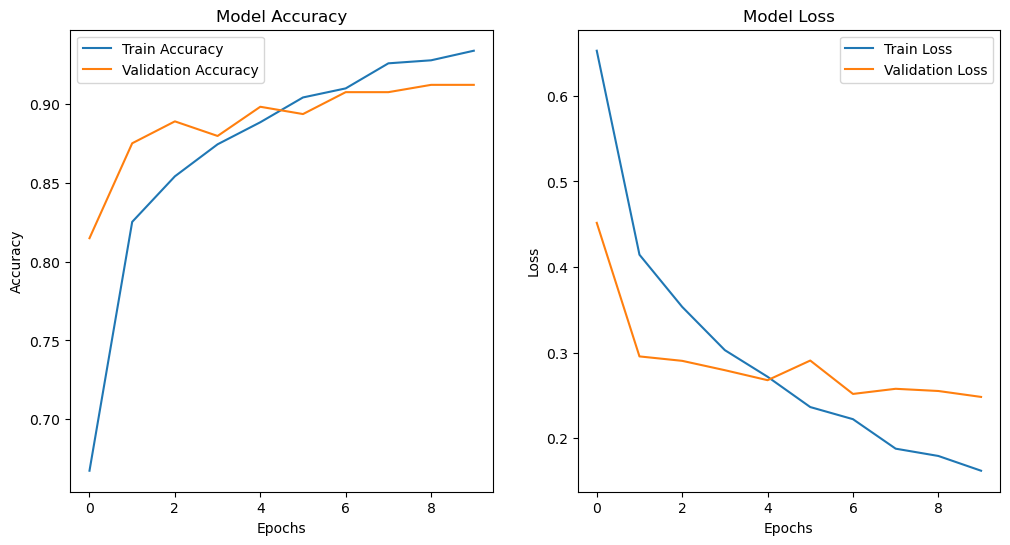

In [13]:
# Data Visualization: Plot accuracy and loss curves
plt.figure(figsize=(12, 6))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the saved models
cnn_model = load_model('cnn_feature_extractor_binary.h5')
nb_classifier = joblib.load('nb_classifier_binary.pkl')

def classify_image(img_path):
    # Load and preprocess the new image
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match the CNN input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to match the training preprocessing

    # Extract features using the CNN model
    features = cnn_model.predict(img_array)
    features = features.reshape(1, -1)  # Flatten to 1D for nb

    # Classify the features with the nb model
    prediction = nb_classifier.predict(features)
    
    # Interpret the prediction (0 for male, 1 for female)
    class_labels = {0: 'Male', 1: 'Female'}
    result = class_labels[prediction[0]]
    return result

img_path ='C:/Users/DELL/Downloads/New_folder/SEC_Five/dataset/test/female/113037.jpg'

if os.path.exists(img_path):
    result = classify_image(img_path)
    print(f"The image is classified as: {result}")
else:
    print(f"Error: The file {img_path} does not exist.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
The image is classified as: Female
